# Data Quality Checks

### Content:
- Perform EDA
- Mixed Type Data Check
- Missing Value Check
- Fix Inconsistency Issue
- Duplicates

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os

In [2]:
#import data set
path = '/Users/kimballwightman/Documents/CareerFoundry/Used Car Sales Analysis/'

In [3]:
df_cars = pd.read_csv(os.path.join(path,'02 Data','Original Data','true_car_listings.csv'))

## Perform EDA

In [4]:
df_cars.shape

(852122, 8)

In [5]:
df_cars.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [6]:
#check the continuous variables
df_cars.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [7]:
#Price first
df_cars['Price'].value_counts().sort_index()

1500      85
1511       1
1527       1
1534       1
1550       2
          ..
462000     1
469973     1
469991     1
490000     1
499500     1
Name: Price, Length: 47124, dtype: int64

The min and max seemed really even numbers, so I checked to see if there were mutliple values above or below that defaulted to those values. The min value of 1500 is observed 85 times. If they actually are cars with low prices that could be below 1500, then I'd expect them to have on old year and high mileage, which I'll check below.

In [8]:
df_min_price = df_cars[df_cars['Price']==1500]

In [9]:
df_min_price.head(20)

,Price,Year,Mileage,City,State,Vin,Make,Model
64010,1500,2002,107885,Philadelphia,PA,2G4WS52J321276604,Buick,Century4dr
64965,1500,1998,100296,Levittown,PA,2G4WY52M9W1574802,Buick,Century4dr
67075,1500,1998,177213,South Jordan,UT,1G4CU5219W4643710,Buick,Park
68710,1500,1999,160000,Newark,NJ,2G4WB52K6X1507138,Buick,Regal4dr
102581,1500,2009,129703,Lakewood,NJ,KL1TD56E69B664751,Chevrolet,Aveo4dr
106684,1500,2006,110480,Miami,FL,KL1TD66606B644067,Chevrolet,Aveo5dr
112120,1500,1998,113842,Middlesboro,KY,1G1NE52M1W6200680,Chevrolet,Malibu4dr
135021,1500,2004,132519,South Jordan,UT,1GNDX03E04D170692,Chevrolet,VentureExt
135230,1500,2002,160369,Chicago,IL,1GNDT13S222423883,Chevrolet,TrailBlazer4dr
138315,1500,2003,178717,Valdosta,GA,1G1JC52F137258414,Chevrolet,Cavalier4dr


These seem to actually be really low value cars. The data comes from TrueCar.com, which might not let you list a price below 1500. Since there are only 85 out of 852,122 instances, and values can't go much lower than 1500, I'm considering them to be negligible. They'll hardly skew the results of our analysis at all.

<AxesSubplot:ylabel='Frequency'>

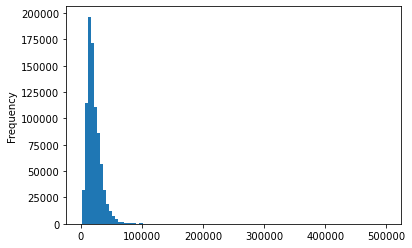

In [10]:
df_cars['Price'].plot.hist(bins = 100)

In [11]:
#Mileage next
df_cars['Mileage'].value_counts().sort_index()

5          350
6          173
7          138
8          180
9          153
          ... 
1650780      1
1814638      1
2137327      1
2457832      1
2856196      1
Name: Mileage, Length: 158836, dtype: int64

<AxesSubplot:ylabel='Frequency'>

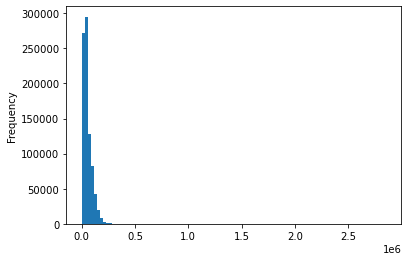

In [12]:
df_cars['Mileage'].plot.hist(bins = 100)

<AxesSubplot:ylabel='Frequency'>

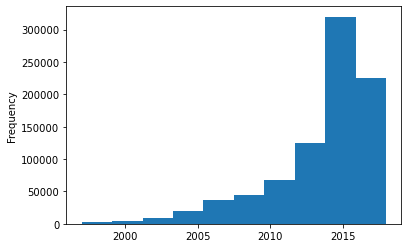

In [13]:
#check distribution of year as well
df_cars['Year'].plot.hist(bins = 10)

In [14]:
df_cars.head(20)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
5,7989,2012,105246,Miami,FL,JH4CU2F83CC019895,Acura,TSXAutomatic
6,14490,2014,34032,Greatneck,NY,JH4CU2F84EC002686,Acura,TSXSpecial
7,13995,2013,32384,West Jordan,UT,JH4CU2F64DC006203,Acura,TSX5-Speed
8,10495,2013,57596,Waterbury,CT,19VDE2E50DE000234,Acura,ILX6-Speed
9,9995,2013,63887,El Paso,TX,19VDE1F50DE010450,Acura,ILX5-Speed


In [15]:
#check the categorical variables
df_cars['City'].value_counts()

Houston          12703
San Antonio       8078
Louisville        5872
Jacksonville      5675
Austin            5297
                 ...  
Pleasant Hill        4
Port Jervis          4
Los Banos            4
Pen Argyl            4
Royston              2
Name: City, Length: 2553, dtype: int64

In [16]:
df_cars['State'].value_counts().sort_index()

 AK     1663
 AL    13293
 AR     6952
 AZ    22401
 Az       63
 CA    80437
 CO    23004
 CT    10906
 Ca       31
 DC       25
 DE     2418
 FL    72530
 Fl      783
 GA    39414
 Ga      109
 HI     2995
 IA     4840
 ID     3501
 IL    38680
 IN    16465
 KS     7894
 KY    13691
 LA     8528
 MA    17990
 MD    17572
 ME     1920
 MI    10328
 MN    10996
 MO    16165
 MS     6242
 MT     1984
 Md      135
 NC    37530
 ND     1092
 NE     4924
 NH     5694
 NJ    27852
 NM     4729
 NV     6887
 NY    27932
 OH    23259
 OK     9584
 OR    10352
 Oh       52
 PA    28130
 RI     1858
 SC     9790
 SD     1267
 TN    19166
 TX    94654
 UT    10418
 VA    35011
 VT     1123
 Va      248
 WA    23149
 WI    11255
 WV     1501
 WY      610
 ga      100
Name: State, dtype: int64

There are inconsistencies in Arizona, California, Florida, Georgia(GA,Ga,ga), Maryland, Ohio, and Virginia.

In [17]:
df_cars['Make'].value_counts()

Ford             110432
Chevrolet        102268
Toyota            77786
Nissan            66250
Honda             50193
Jeep              40373
Hyundai           35837
Dodge             34368
BMW               32415
GMC               29008
Kia               28636
Mercedes-Benz     26323
Volkswagen        23249
Lexus             20641
Ram               19808
Subaru            16428
Chrysler          16357
Cadillac          15047
Mazda             13365
Audi              12618
Buick             12491
INFINITI          12258
Acura             11049
Lincoln            7120
Volvo              5106
MINI               4375
Porsche            4106
Land               4096
Mitsubishi         4080
Scion              3043
Jaguar             2200
Pontiac            1783
FIAT               1782
Mercury            1076
Maserati           1047
Saturn              963
HUMMER              949
smart               713
Bentley             367
Ferrari             345
Suzuki              334
Saab            

In [18]:
df_cars['Model'].value_counts()

Silverado          24932
Grand              17321
Accord             14502
F-1504WD           14177
Altima2.5          11288
                   ...  
EdgeLTD                1
ExpeditionEddie        1
EscortSE               1
Ranger                 1
V60Polestar            1
Name: Model, Length: 2736, dtype: int64

### Mixed Type Data

In [19]:
for col in df_cars.columns.tolist():
    mix = (df_cars[[col]].applymap(type) != df_cars[[col]].iloc[0].apply(type)).any(axis = 1)
    if len(df_cars[mix]) > 0:
        print (col)

No mixed type columns.

### Missing Values

In [20]:
df_cars.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

No missing values.

### Fix the Inconsistency in the State variable

In [4]:
df_cars['State'].replace({' Az':' AZ',' Ca':' CA',' Fl':' FL',' Ga':' GA',' ga':' GA',' Md':' MD',' Oh':' OH',' Va':' VA',}, inplace = True)


In [5]:
df_cars.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [5]:
df_cars['State'].value_counts().sort_index()

 AK     1663
 AL    13293
 AR     6952
 AZ    22464
 CA    80468
 CO    23004
 CT    10906
 DC       25
 DE     2418
 FL    73313
 GA    39623
 HI     2995
 IA     4840
 ID     3501
 IL    38680
 IN    16465
 KS     7894
 KY    13691
 LA     8528
 MA    17990
 MD    17707
 ME     1920
 MI    10328
 MN    10996
 MO    16165
 MS     6242
 MT     1984
 NC    37530
 ND     1092
 NE     4924
 NH     5694
 NJ    27852
 NM     4729
 NV     6887
 NY    27932
 OH    23311
 OK     9584
 OR    10352
 PA    28130
 RI     1858
 SC     9790
 SD     1267
 TN    19166
 TX    94654
 UT    10418
 VA    35259
 VT     1123
 WA    23149
 WI    11255
 WV     1501
 WY      610
Name: State, dtype: int64

In [7]:
df_cars.shape

(852122, 8)

### Duplicates

In [6]:
df_dups = df_cars[df_cars.duplicated()]

In [7]:
df_dups

,Price,Year,Mileage,City,State,Vin,Make,Model
120948,16288,2015,54545,Pensacola,FL,2G1FB1E32F9284364,Chevrolet,CamaroCoupe
120949,19995,2016,17604,Beaumont,TX,2G11Z5SA9G9130915,Chevrolet,ImpalaLS
120950,5774,2008,125675,Fort Wayne,IN,2G1WT58K781214125,Chevrolet,Impala4dr
120951,20990,2017,17219,Marshfield,MO,2G1105S30H9120402,Chevrolet,ImpalaLT
120952,22573,2016,622,Colorado Springs,CO,1GCNCNEC9GZ402232,Chevrolet,Silverado
120953,11495,2014,80086,Langhorne,PA,1G1JC6SH8E4194609,Chevrolet,SonicHatchback
120954,28800,2017,4165,Smyrna,GA,2GNFLGE38H6240856,Chevrolet,EquinoxAWD
120955,14771,2014,78400,New Haven,IN,1G1125S39EU113487,Chevrolet,Impala2LT
120956,15907,2015,65274,Corpus Christi,TX,2G1FB1E30F9190774,Chevrolet,CamaroCoupe
120957,12894,2014,57113,Delray Beach,FL,1G1RA6E44EU129757,Chevrolet,VoltPlug-In


In [8]:
df_no_dups = df_cars.drop_duplicates()

In [9]:
df_no_dups.shape

(852092, 8)

New dataframe has 30 fewer rows, duplicates were successfully dropped.

In [12]:
#export the dataset
df_no_dups.to_csv(os.path.join(path,'02 Data','Prepared Data','cars_cleaned.csv'))

In [10]:
df_no_dups.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
